In [1]:
import os
import numpy as np # import numerical python
import pandas as pd # import pandas
import scipy as sp
import xarray as xr # import xarray
import struct # import for importing binary
import matplotlib.pyplot as plt
from copy import deepcopy
from scipy.special import erf

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import matplotlib.font_manager
from matplotlib import cm
import os
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import sys
sys.path.append("/home/jbeckwith/Documents/Dropbox (Cambridge University)/Chemistry/Lee/Code/Python/CommonFunctions") 
import GaussExp_Distribution
import MVChangePoint
import DHOF_Distribution
import DHOA_Distribution
from PlottingFunctions import Plotter
plots = Plotter(poster=True)
GED = GaussExp_Distribution.gaussexp_dist
MVCP = MVChangePoint.MVCP()

In [ ]:
data[data.IntGradientBefore > value].CP_location.values

In [53]:
tau1 = 10
A = 500
B = 1
amps = 1
sigma = 0.1

tau2list = np.logspace(np.log10(tau1/10.), np.log10(tau1*10), 100)
ntests = 100
tau2 = 1
    
mydist_1 = GED(tau1, amps, sigma)
mydist_2 = GED(tau2, amps, sigma)
nsignal = int(A/2)
CPL = A/2
data = np.zeros([A, B, ntests])
for i in np.arange(B):
    signal_1 = (mydist_1.rvs(size=(nsignal, ntests))) # get signal
    signal_2 = (mydist_2.rvs(size=(nsignal, ntests))) # get signal
    data[:, i, :] = np.vstack([signal_1, signal_2])

In [54]:
from changeforest import changeforest

In [57]:
result = changeforest(data[:, :, 0], "random_forest")
result

                best_split max_gain p_value
(0, 500]               249  101.326   0.005
 ¦--(0, 249]           243  -31.426   0.995
 °--(249, 500]         254  -34.727   0.895

In [50]:
S = 1.25
nu0 = 20
sigma1 = 0.2
omega = 0.4
ntests = 1
A = 500
B = 100
nsignal = int(A/2)
CPL = A/2

sigma2 = 0.15
DHO_1 = DHOF_Distribution.DHOF_dist(S, nu0, sigma1, omega)
DHO_2 = DHOF_Distribution.DHOF_dist(S, nu0, sigma2, omega)

data_dho = np.zeros([A, B, ntests])
for i in np.arange(B):
    signal_1 = (DHO_1.rvs(size=(nsignal, ntests))) # get signal
    signal_2 = (DHO_2.rvs(size=(nsignal, ntests))) # get signal
    data_dho[:, i, :] = np.vstack([signal_1, signal_2])
 
data_wavelength = 1e4/data_dho
bins = np.linspace(480, 600, 51)
data_wavelength_spec = np.zeros([A, len(bins)-1, ntests])
for test in np.arange(ntests):
    for i in np.arange(A):
        data_wavelength_spec[i, :, test] = np.histogram(data_wavelength[i, :, test], bins=bins)[0]    


In [51]:
result = changeforest(data_wavelength_spec[:, :, 0], "random_forest", "bs")
result

                best_split max_gain p_value
(0, 500]               249  100.421   0.005
 ¦--(0, 249]           241  -26.814   0.855
 °--(249, 500]         264   -1.082    0.64

/tmp/ipykernel_257707/1617723772.py:1: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  result.plot().show()


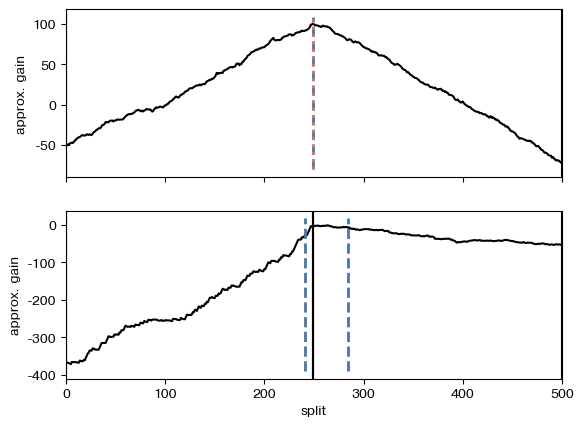

In [52]:
result.plot().show()

In [65]:
result

                best_split max_gain p_value
(0, 500]               249  101.326   0.005
 ¦--(0, 249]           243  -31.426   0.995
 °--(249, 500]         254  -34.727   0.895